In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve,roc_auc_score,f1_score

In [9]:
df=pd.read_csv('bank-full.csv',sep=';')

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

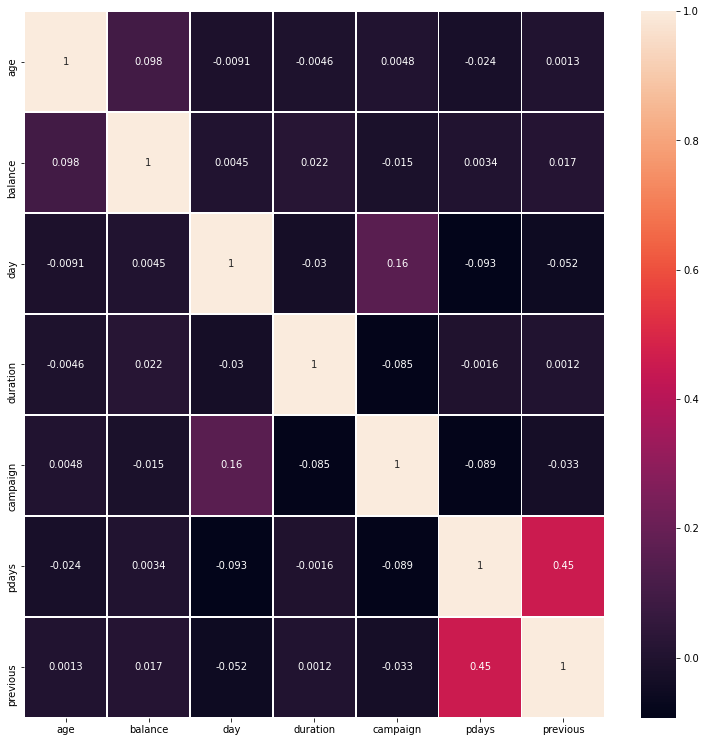

In [14]:
fig, ax = plt.subplots(figsize=(13,13))         
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_column:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [15]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome','default','housing','loan']
for col in cat_columns:
    df=pd.concat([df.drop(col,axis=1),
    pd.get_dummies(df[col],prefix=col,prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)

In [16]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,0,0,1,0,1,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

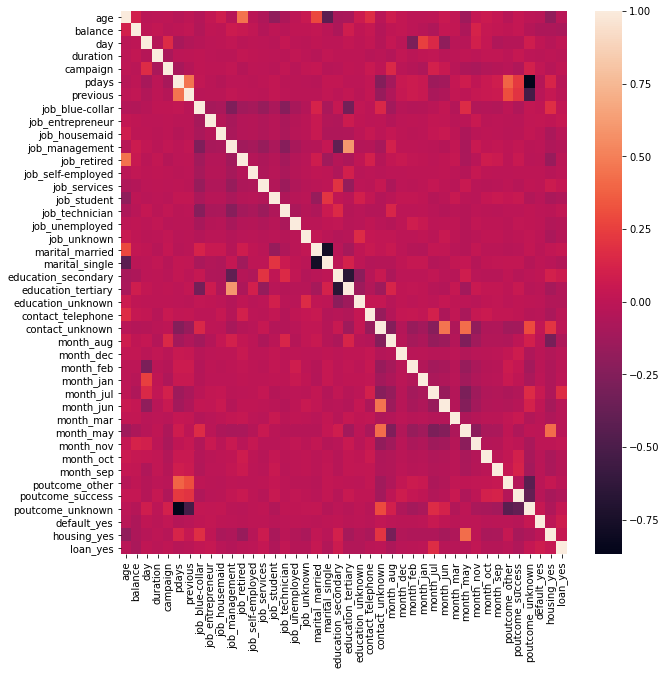

In [61]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(df.corr())

In [17]:
y=df.y

In [18]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [19]:
X=df.drop(['y'],axis=1)

In [20]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [56]:
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.linear_model import LogisticRegression

spl=5
skf=StratifiedKFold(n_splits=spl)
skf.get_n_splits(X,y)

lg_acc,lg_fs=[],[]
print(skf)

for train_index,test_index in skf.split(X,y):
    print("TRAIN:",train_index, "TEST:",test_index)
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

    lg=LogisticRegression(random_state=0).fit(X_train,y_train)
    lg_y_pred=lg.predict(X_test)

    print("FOLD ACCURACY:",lg_acc.append(accuracy_score(y_test,lg_y_pred)))
   # print("FOLD ACCURACY:",lg_fs.append(f1_score(y_test,lg_y_pred)))


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 8254  8255  8256 ... 45208 45209 45210] TEST: [    0     1     2 ... 21884 21909 21924]
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
FOLD ACCURACY: None
TRAIN: [    0     1     2 ... 45208 45209 45210] TEST: [ 8254  8255  8256 ... 33809 33815 33818]
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

In [51]:
print("ACCURACY OF LOGISTIC REGRESSION: {:0.2f} +/- {:0.2f}". format(np.mean(lg_acc),np.std(lg_acc)))
#print("F-SCORE OF LOGISTIC REGRESSION: {:0.2f} +/- {:0.2f}". format(np.mean(lg_fs),np.std(lg_fs)))

cm=confusion_matrix(y_test,lg_y_pred)
cm

ACCURACY OF LOGISTIC REGRESSION: 0.88 +/- 0.01


array([[7499,  485],
       [ 652,  406]], dtype=int64)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score
spl=5
skf=StratifiedKFold(n_splits=spl)
skf.get_n_splits(X,y)

acc,fs=[],[]
print(skf)

for train_index,test_index in skf.split(X,y):
    print("TRAIN:",train_index, "TEST:",test_index)
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

    gnb=GaussianNB().fit(X_train,y_train)
    gnb_y_pred=gnb.predict(X_test)

    #print("FOLD ACCURACY:",accuracy_score(y_test,lg_y_pred))

    fb=fbeta_score(y_test,gnb_y_pred,average='macro',beta=0.5)
    print("FOLD ACCURACY: ",accuracy_score(y_test,gnb_y_pred))
    acc.append(accuracy_score(y_test,gnb_y_pred))
    #print("FOLD ACCURACY:",fs.append(f1_score(y_test,gnb_y_pred)))

print("F-beta Score is: {:0.2f}+/-{:0.2f}".format(np.mean(fb),np.std(fb)))
print("ACCURACY OF NAIVE BAYES: {:0.2f} +/- {:0.2f}". format(np.mean(acc),np.std(acc)))
#print("F-SCORE OF LOGISTIC REGRESSION: {:0.2f} +/- {:0.2f}". format(np.mean(fs),np.std(fs)))

cm=confusion_matrix(y_test,gnb_y_pred)
cm

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 8254  8255  8256 ... 45208 45209 45210] TEST: [    0     1     2 ... 21884 21909 21924]
FOLD ACCURACY: 0.8947252018135574
TRAIN: [    0     1     2 ... 45208 45209 45210] TEST: [ 8254  8255  8256 ... 33809 33815 33818]
FOLD ACCURACY: 0.5736562707365627
TRAIN: [    0     1     2 ... 45208 45209 45210] TEST: [16701 16702 16703 ... 40710 40718 40719]
FOLD ACCURACY: 0.37900906879009066
TRAIN: [    0     1     2 ... 45208 45209 45210] TEST: [25196 25197 25198 ... 43174 43175 43176]
FOLD ACCURACY: 0.49458084494580845
TRAIN: [    0     1     2 ... 43174 43175 43176] TEST: [34226 34227 34228 ... 45208 45209 45210]
FOLD ACCURACY: 0.5646980756469807
F-beta Score is:0.52+/-0.00
ACCURACY OF NAIVE BAYES: 0.58 +/- 0.17


array([[4239, 3745],
       [ 191,  867]], dtype=int64)